In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('clustering_data.csv')

<ipython-input-3-8abcaa7112b8>:1: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('clustering_data.csv')


In [ ]:
home_state = 'TELANGANA'
state_df = df[df['StateName'] == home_state]
state_df = state_df.dropna(subset=['Pincode', 'Latitude', 'Longitude'])

# Replace 'NA' strings with actual NaN values in Latitude and Longitude columns
state_df['Latitude'].replace('NA', np.nan, inplace=True)
state_df['Longitude'].replace('NA', np.nan, inplace=True)

# Convert Latitude and Longitude to numeric, forcing errors to NaN
state_df['Latitude'] = pd.to_numeric(state_df['Latitude'], errors='coerce')
state_df['Longitude'] = pd.to_numeric(state_df['Longitude'], errors='coerce')

# Check for missing values and handle them if any
state_df = state_df.dropna(subset=['Latitude', 'Longitude'])

# Check for duplicates and handle them if any
state_df = state_df.drop_duplicates(subset=['Pincode'])

# Extract latitude and longitude data for clustering
lat_long_data = state_df[['Latitude', 'Longitude']].values

In [ ]:
def k_means(X, k, max_iters=100):
    np.random.seed(42)
    centroids = X[np.random.choice(X.shape[0], k, replace=False)]

    for _ in range(max_iters):
        # Assign clusters
        distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)
        labels = np.argmin(distances, axis=1)

        # Calculate new centroids
        new_centroids = np.array([X[labels == i].mean(axis=0) for i in range(k)])

        # Check for convergence
        if np.all(centroids == new_centroids):
            break
        centroids = new_centroids

    return labels, centroids

In [ ]:
k = 5

labels, centroids = k_means(lat_long_data, k)

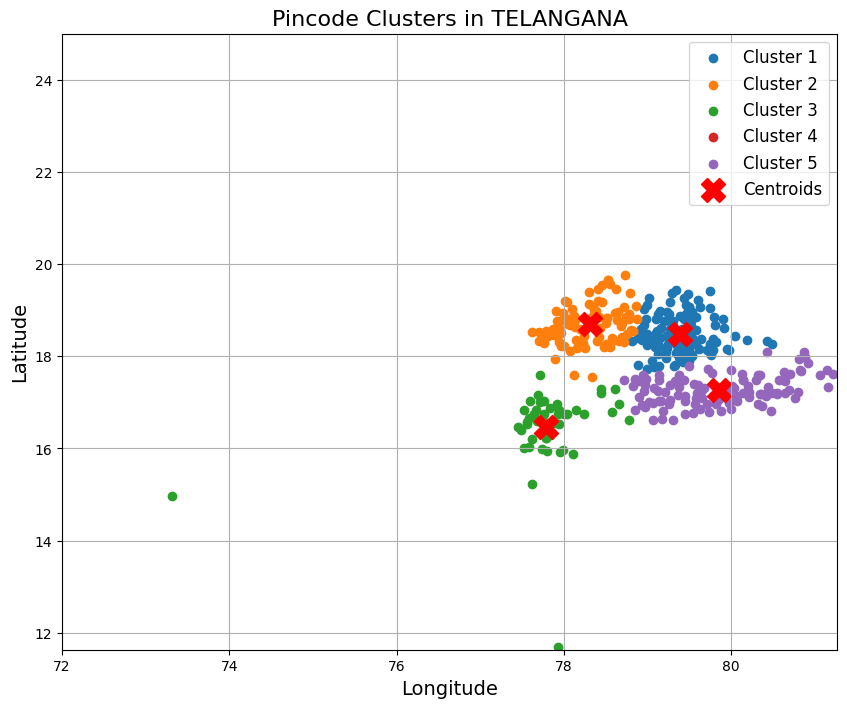

Cluster 1:
Number of pincodes: 112
Centroid location: [18.49162105 79.39253101]
Sample pincodes from this cluster:
      Pincode
278  505186.0
281  505153.0
283  505162.0
285  505152.0
288  505514.0 

Cluster 2:
Number of pincodes: 87
Centroid location: [18.70921908 78.30882412]
Sample pincodes from this cluster:
      Pincode
138  503186.0
139  503180.0
141  503187.0
142  503101.0
143  503125.0 

Cluster 3:
Number of pincodes: 47
Centroid location: [16.4572215  77.78658135]
Sample pincodes from this cluster:
       Pincode
333   501505.0
2386  500005.0
2886  999999.0
3346  509382.0
3348  509407.0 

Cluster 4:
Number of pincodes: 1
Centroid location: [36.8964 65.9869]
Sample pincodes from this cluster:
        Pincode
11802  506168.0 

Cluster 5:
Number of pincodes: 108
Centroid location: [17.27106626 79.85922511]
Sample pincodes from this cluster:
      Pincode
497  507204.0
499  507169.0
501  507208.0
504  507002.0
505  507168.0 



In [ ]:
plt.figure(figsize=(10, 8))

# Plotting the clusters
for i in range(k):
    plt.scatter(lat_long_data[labels == i, 1], lat_long_data[labels == i, 0], label=f'Cluster {i+1}')
plt.scatter(centroids[:, 1], centroids[:, 0], s=300, c='red', label='Centroids', marker='X')

# Adding title and labels
plt.title(f'Pincode Clusters in {home_state}', fontsize=16)
plt.xlabel('Longitude', fontsize=14)
plt.ylabel('Latitude', fontsize=14)

# Adding a legend
plt.legend(fontsize=12)

# Adding grid for better readability
plt.grid(True)

# Adjusting plot limits to provide better scaling
plt.xlim([72, max(lat_long_data[:, 1]) + 0.05])
plt.ylim([min(lat_long_data[:, 0]) - 0.05, 25])

# Display the plot
plt.show()


for i in range(k):
    cluster_points = state_df[labels == i]
    print(f"Cluster {i+1}:")
    print(f"Number of pincodes: {len(cluster_points)}")
    print(f"Centroid location: {centroids[i]}")
    print("Sample pincodes from this cluster:")
    if 'Location' in state_df.columns:
        print(cluster_points[['Pincode', 'Location']].head(), "\n")
    else:
        print(cluster_points[['Pincode']].head(), "\n")